In [11]:
### CODE CHALLENGE: Solve the String Composition Problem.
         
def kmer_composition(text,k):
    """Input: An integer k and a string Text.
     Output: Compositionk(Text) (the k-mers can be provided in any order)."""
    composition = []
    for i in range(len(text)-k+1):
        composition.append(text[i:i+k])
    return composition       

In [13]:
text = 'CAATCCAAC'
x = kmer_composition(text,5)
print x
' '.join(str(i) for i in x)

['CAATC', 'AATCC', 'ATCCA', 'TCCAA', 'CCAAC']


'CAATC AATCC ATCCA TCCAA CCAAC'

In [101]:
###String Spelled by a Genome Path Problem. Reconstruct a string from its genome path.
def string_from_genome_path(kmers):
    return kmers[0] + ''.join(map(lambda x: x[-1], kmers[1:])) 

In [50]:
kmers = ['ACCGA', 'CCGAA', 'CGAAG', 'GAAGC', 'AAGCT']
string_from_genome_path(kmers)

'ACCGAAGCT'

In [52]:
kmers = [line.strip() for line in open('dataset_198_3.txt', 'r')]
string_from_genome_path(kmers)

'AGACTGAAAGTCAATGCAGGTTGTCAAGAGCTGGTCGGAGGAGCCATTATTGTTAACGGGTCCCGGTAATCCGTCATGTGTATCCTACATGTCAATAGAACGACACAAAGGCTAAAATGATCTGTCGATGATACACATGTCCTGCAAGACAACTGACGCTAAGGTTTGAACTGCAGAGGGTTTGTCCAACACACATAATCTCGGCACATCTTATTAAGCGCCCCGAATCGCTTTGTTGGATTAACACGCCTCGACGCCTGAATAGGAACCACATCCCCGTAACTGAGCTCGTGCACAGAGCTTCATCGCATAGGTCACTCAAGACTTGTGGCTTGTTCATCGTAGGCCGCATTACAAGGCAATAGCATGTCGTGGTGTGTACAGCAGAATCCCCGTAGACCAAAAGAGAGAAGTGCCCCGGCGTCCTAACTCTAGCGCTTCATTACTAAGGGACGCAAACATTGAACGTCCTGTAATTTAAAGCATGGAGCTTTATGGTAGAATATAAACCCTGTGGCTTTCAGCTTAAAAATTGTCCCAATAGCCGGTTTACTTATCGGCCGCGTGTCGCCAACTGTGGCTTGCGTAGGTCGCGTTGGTAAGGGGCACAGCGTTTTGGTCCTCAATCCGTGCGGTCTGTCTTAGTACCAAGCAAAGCAGTGCCTTGCAGATCTCCGTGCACACAAAGCGAGTGTAACGCAACTGCCAATCCCCGAGTCCATAGGAGGTTAGACTTCCCAAAAAAACTACCAATGTGGATATGTCTCCGTTTGACCCTGATCAATTCGCACTTGCTTGTCATTCCCACGACCTCCATTTTTAGCCATAGACAGCGTACTGTTCCCGATGATAAGCGTTGCCACGATGGCTAGACTAATCCACCGCTAAAGTGTGAAAAAGCGAGCTGAAGGTGATATGATAGTCCAGTACAGTGTGCTACTACGGGGTAGAGGATCCAATAGGTTTCAGCCGAATGAAGAATAATCATCGCAGCTGGCT

In [32]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [46]:
from itertools import permutations
list(permutations([1,2,3],3))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [47]:
reads = ['ACGGATC', 'GATCAAGT', 'TTCACGGA']
list(permutations(reads, 2))

[('ACGGATC', 'GATCAAGT'),
 ('ACGGATC', 'TTCACGGA'),
 ('GATCAAGT', 'ACGGATC'),
 ('GATCAAGT', 'TTCACGGA'),
 ('TTCACGGA', 'ACGGATC'),
 ('TTCACGGA', 'GATCAAGT')]

In [79]:
#Solve the Overlap Graph Problem (restated below).
from itertools import permutations
from collections import defaultdict
def overlap_graph(reads):
    '''Input: A collection Patterns of k-mers.
     Output: The overlap graph Overlap(Patterns), in the form of an adjacency list. (You may return the edges in any order.)'''
    olaps = defaultdict(list)
    for a, b in permutations(reads, 2):
        if a[1:] == b[:-1]:
            olaps[a].append(b)
    return olaps

In [80]:
reads = ['ATGCG','GCATG','CATGC','AGGCA','GGCAT']
graph = (overlap_graph(reads))
for x,y in graph.iteritems():
    print x,'->', ' '.join(y)

AGGCA -> GGCAT
GGCAT -> GCATG
GCATG -> CATGC
CATGC -> ATGCG


In [62]:
d = {}
d['a'] = 'b'
d['b'] = 'c'
d
for x,y in d.iteritems():
    print x,'->',y

a -> b
b -> c


In [90]:
#Solve the De Bruijn Graph from a String Problem.
from collections import defaultdict
def debruijnize(st, k):
    """ Return a adjacency list, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = defaultdict(list)
    for i in range(len(st) - k + 1):
        kmer = st[i:i+k]
        edges[kmer[:-1]].append(kmer[1:])
    return edges

In [91]:
edges = debruijnize("ACGCGTCG", 3)
for x,y in edges.iteritems():
    print x,'->', ','.join(y)

GC -> CG
AC -> CG
GT -> TC
CG -> GC,GT
TC -> CG


In [20]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) -k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [93]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

In [94]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


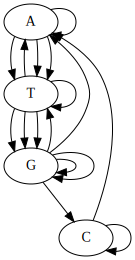

In [97]:
%dotstr visualize_de_bruijn("TAATGCCATGGGATGTT", 2)

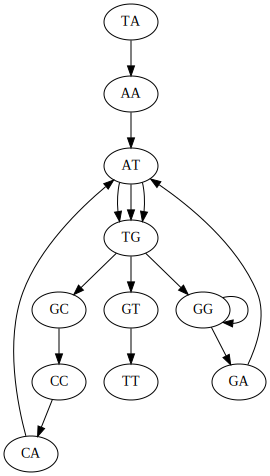

In [98]:
%dotstr visualize_de_bruijn("TAATGCCATGGGATGTT", 3)

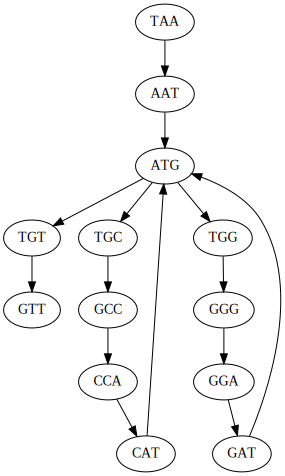

In [99]:
%dotstr visualize_de_bruijn("TAATGCCATGGGATGTT", 4)

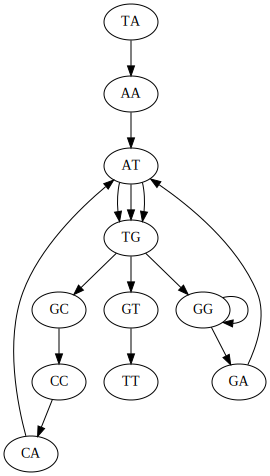

In [100]:
%dotstr visualize_de_bruijn("TAATGGGATGCCATGTT", 3)

In [76]:
from collections import defaultdict
def debruijn_from_kmer(kmers):
    '''Input: A collection of k-mers Patterns.
     Output: The adjacency list of the de Bruijn graph DeBruijn(Patterns).'''
    edges = defaultdict(list)
    for kmer in kmers:
        edges[kmer[:-1]].append(kmer[1:])
    return edges

In [77]:
kmers = ['GAGG','CAGG','GGGG','GGGA','CAGG','AGGG','GGAG']
for x,y in sorted(debruijn_from_kmer(kmers).iteritems()):
    print x,'->', ','.join(y)

AGG -> GGG
CAG -> AGG,AGG
GAG -> AGG
GGA -> GAG
GGG -> GGG,GGA


## Eulerian cycle and eulerian walk

In [120]:
def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

In [143]:
graph = {0:[3],1:[0],2:[1,6],3:[2], 4:[2], 5:[4], 6:[5,8], 7:[9], 8:[7], 9:[6]}
edges = generate_edges(graph)
print edges

[(0, 3), (1, 0), (2, 1), (2, 6), (3, 2), (4, 2), (5, 4), (6, 5), (6, 8), (7, 9), (8, 7), (9, 6)]


In [157]:
def nodes_degrees(edges):
    ''' This returns a dictionary of nodes and their degrees. The degree of a vertex is the number of edges connecting
        it, i.e. the number of adjacent vertices. Loops are counted double, i.e. every occurence of vertex in the list 
        of adjacent vertices. '''

    degrees = dict()    
    for a, b in edges:
        degrees[a] = degrees.get(a, 0) + 1
        degrees[b] = degrees.get(b, 0) + 1
    return degrees

In [158]:
edges = generate_edges(graph)
nodes_degrees(edges)

{0: 2, 1: 2, 2: 4, 3: 2, 4: 2, 5: 2, 6: 4, 7: 2, 8: 2, 9: 2}

In [159]:
def highest_degree_node(edges):
    degrees = nodes_degrees(edges)
    return max(degrees, key=degrees.get)

In [160]:
highest_degree_node(edges)

2

In [78]:
g = {0:[3],1:[0],2:[1,6],3:[2], 4:[2], 5:[4], 6:[5,8], 7:[9], 8:[7], 9:[6]}
def eulerianCycle(g):
    """ Input: The adjacency list of an Eulerian directed graph.
     Output: An Eulerian cycle in this graph."""
    tour = []
    src = g.iterkeys().next() # pick arbitrary starting node
    def visit(n):
        while len(g[n]) > 0:
            dst = g[n].pop()
            visit(dst)
        tour.append(n)
    visit(src)
    tour = tour[::-1] # reverse and then take all but last node
    return tour

In [6]:
tour = eulerianCycle(g)
'->'.join(str(i) for i in tour)

'0->3->2->6->8->7->9->6->5->4->2->1->0'

In [16]:
def read_input(filename):
    f = open(filename, 'r')
    g = dict()
    for line in f:
        line = line.strip()
        line = line.split(' -> ')
        g[int(line[0])] = [int(x) for x in line[1].split(',')]
    return g

In [79]:
g = read_input('rosalind_ba3f.txt')
def eulerianCycle(g):
    """ Input: The adjacency list of an Eulerian directed graph.
     Output: An Eulerian cycle in this graph."""
    tour = []
    src = g.iterkeys().next() # pick arbitrary starting node
    def visit(n):
        while len(g[n]) > 0:
            dst = g[n].pop()
            visit(dst)
        tour.append(n)
    visit(src)
    tour = tour[::-1] # reverse and then take all but last node
    return tour
tour = eulerianCycle(g)
'->'.join(str(i) for i in tour)

'0->2->6->541->1215->1214->1213->541->542->543->6->31->32->771->1355->2441->2442->2440->1355->1356->1354->771->770->769->32->33->156->911->910->1203->1201->1202->1674->2189->2190->2188->1674->1672->1673->1202->910->912->1232->2903->2902->2904->1232->1873->1874->1875->1232->1231->1233->912->156->154->553->555->554->932->931->933->554->2488->2489->2490->554->2201->2200->2202->554->2088->2086->2087->554->1184->1183->1185->2103->2102->2101->2396->2395->2397->2101->1185->554->154->155->33->6->4->8->83->231->1723->1725->1800->1799->1798->1725->1724->231->229->230->83->82->84->8->39->48->62->688->1088->1586->1585->1587->1088->1089->1087->688->690->967->1250->1249->1251->967->968->969->690->1486->1487->1488->690->689->62->63->61->48->1365->1363->2030->2031->2029->1363->1364->48->47->514->516->627->625->626->516->515->876->875->874->515->2323->2325->2324->515->47->483->482->481->530->1438->1440->1439->530->529->680->1860->1858->1859->2041->2042->2956->2957->2958->2042->2043->1859->680->679->681

def eulerianCycle(graph):
    # init cycle with any node
    cycle = [graph.keys()[0]]
    ##### move all edges from graph to cycle
    while len(graph) > 0:
        # if cycle is closed shift to a node with remaining targets
        if cycle[0] == cycle[-1]:
            while not cycle[0] in graph:
                cycle.pop(0)
                cycle.append(cycle[0])
        ##### source is the last node of cycle
        source = cycle[-1]
        ##### move one target from graph to cycle
        cycle.append(graph[source].pop())
        ##### clean sources without targets
        if len(graph[source]) == 0: del graph[source]
    return cycle

In [7]:
g = {0:[2], 1:[3], 2:[1], 3:[0,4], 6:[3,7], 7:[8], 8:[9], 9:[6]}
nodes = g.keys()
nodes

[0, 1, 2, 3, 6, 7, 8, 9]

In [80]:
def outdegree(g,node):
    """Returns the number of outgoing edges from a node"""
    try:
        return len(g[node])
    except:
        return 0
outdegree(g,4)

0

In [81]:
def indegree(g,node):
    """Returns the number of incoming edges from a node"""
    incoming = [k for k,v in g.iteritems() if node in v]
    return len(incoming)
indegree(g,6)

0

In [82]:
def isSemiBalanced(g,node):
    return abs(indegree(g,node) - outdegree(g,node)) == 1

In [83]:
def isBalanced(g,node):
    return indegree(g,node) == outdegree(g,node)

In [84]:
def head(g):
    """Returns the head of a graph in case of Eulerian Walk"""
    nodes = g.keys()
    head_node = None
    for node in nodes:
        if indegree(g,node) == outdegree(g,node) - 1:
            head_node = node
            break
    return head_node

In [85]:
def tail(g):
    """Returns the tail of a graph in case of Eulerian Walk"""
    neighbors = [v for k in g for v in g[k]]
    tail_node = None
    for node in neighbors:
        if indegree(g,node) == outdegree(g,node) + 1:
            tail_node = node
            break
    return tail_node

In [86]:
g = {0:[2], 1:[3], 2:[1], 3:[0,4], 6:[3,7], 7:[8], 8:[9], 9:[6]}
#kmers = ['CTTA', 'ACCA', 'TACC', 'GGCT', 'GCTT', 'TTAC']
#kmers = [line.strip() for line in open('dataset_203_6.txt', 'r')]
#g = debruijn_from_kmer(kmers)
#setdefault is useful for setting defaults while or after filling the dict.
initialNode = head(g)
print initialNode
terminalNode = tail(g)
print terminalNode
g.setdefault(terminalNode, []).append(initialNode)
print g
# graph g has an Eulerian cycle
tour = []
src = g.iterkeys().next() # pick arbitrary starting node
print "src", src
def visit(n):
    while len(g[n]) > 0:
        dst = g[n].pop()
        visit(dst)
    tour.append(n)
        
visit(src)
print "tour", tour
tour = tour[::-1][:-1] # reverse and then take all but last node
print "tour", tour
sti = tour.index(initialNode)
print "sti", sti
tour = tour[sti:] + tour[:sti]
print "tour", tour

6
4
{0: [2], 1: [3], 2: [1], 3: [0, 4], 4: [6], 6: [3, 7], 7: [8], 8: [9], 9: [6]}
src 0
tour [0, 3, 6, 9, 8, 7, 6, 4, 3, 1, 2, 0]
tour [0, 2, 1, 3, 4, 6, 7, 8, 9, 6, 3]
sti 5
tour [6, 7, 8, 9, 6, 3, 0, 2, 1, 3, 4]


In [87]:
def eulerianWalk(g):
    initialNode = head(g)
    terminalNode = tail(g)
    #setdefault is useful for setting defaults while or after filling the dict.
    g.setdefault(terminalNode, []).append(initialNode)
    # graph g has an Eulerian cycle
    tour = []
    src = g.iterkeys().next() # pick arbitrary starting node
    def visit(n):
        while len(g[n]) > 0:
            dst = g[n].pop()
            visit(dst)
        tour.append(n)
        
    visit(src)
    tour = tour[::-1][:-1] # reverse and then take all but last node
    sti = tour.index(initialNode)
    tour = tour[sti:] + tour[:sti]
    return tour

In [88]:
g = {0:[2], 1:[3], 2:[1], 3:[0,4], 6:[3,7], 7:[8], 8:[9], 9:[6]}
#g = read_input('dataset_203_5.txt')
'->'.join(str(i) for i in eulerianWalk(g))

'6->7->8->9->6->3->0->2->1->3->4'

In [89]:
#kmers = [line.strip() for line in open('dataset_198_3.txt', 'r')]
kmers = ['CTTA', 'ACCA', 'TACC', 'GGCT', 'GCTT', 'TTAC']
g = debruijn_from_kmer(kmers)
print g
eulerianWalk(g)

defaultdict(<type 'list'>, {'CTT': ['TTA'], 'ACC': ['CCA'], 'GCT': ['CTT'], 'GGC': ['GCT'], 'TAC': ['ACC'], 'TTA': ['TAC']})


['GGC', 'GCT', 'CTT', 'TTA', 'TAC', 'ACC', 'CCA']

In [90]:
def stringReconstruction(kmers):
    """Input: An integer k followed by a list of k-mers Patterns.
     Output: A string Text with k-mer composition equal to Patterns. (If multiple answers exist, you may
     return any one.)"""
    g = debruijn_from_kmer(kmers)
    walk = eulerianWalk(g)
    return walk[0] + ''.join(map(lambda x: x[-1], walk[1:]))   

In [91]:
stringReconstruction(kmers)

'GGCTTACCA'

In [92]:
kmers = ['AAAT','AATG','ACCC','ACGC','ATAC','ATCA','ATGC','CAAA','CACC','CATA','CATC','CCAG','CCCA','CGCT','CTCA','GCAT',
         'GCTC','TACG','TCAC','TCAT','TGCA']
stringReconstruction(kmers)

'CAAATGCATCATACGCTCACCCAG'

In [78]:
#map() will apply its lambda function to the elements of the argument lists, i.e. it first applies to the elements with the 0th index, then to the elements with the 1st index until the n-th index is reached
walk = ['GGC', 'GCT', 'CTT', 'TTA', 'TAC', 'ACC', 'CCA']
walk[0] + ''.join(map(lambda x: x[-1], walk[1:])) 

'GGCTTACCA'

In [42]:
import sys
sys.setrecursionlimit(2500)

In [55]:
kmers = [line.strip() for line in open('dataset_203_6.txt', 'r')]
stringReconstruction(kmers)

'AATAAAAGTCAGTATCAGGTGTTCACCGTTATCTCCTGCCGGGCACGGGGGAGGTACCGTGCGTATCTAGGGAGAAGCCCGTCGAGTTCAGGGCCCAATGGTAGGTACTCCCGGTCCACTAATGACCCAACTAGACCACAAGGGGACTACGTACCCTACTCGCGAGCCTAGCTAACTAACTGCCCTGGCTTACGCATGACATACTGCGGTTTGCAGGGTGATGCTAGTATACATGGATGTGATAGCAATCTTTCAACCAAGCATTAGTACCATCGCACTGGAGCGATTTAGGTCGAAACTCATATTCGCTTTATGTGTCCTGGACGTGTATACAAGTCCTTCCTTACTTTACACAATAGCTTGGTACAGTGTCTCGACTCAACTTAAGGTCTTCACCATTTGATCTGTGCTCGTGTGCAGTTAGAGGAGTAGCCCCCACTTTCGTTTCGACGAGTAGACCCACAGCGTTGCGACGTCCACCACCTTTCATCACCACAGTCTCTTCTGGACTTAACAGCATTTATAATACCAGAGGCGCGGTATCACTGGATCTTCAACTGCGAATGTGAGGAGGTCCTGGATTATAGTGTCCTGCAACATGGATGCACGACCCGGAAACACCGGGATTGATCCAGACGAGATTGACTATTTAACGAGGAAGGTTCGTAATAGCATCGGGAGAGGATATGGCTCACCAGTCTTCGGTATATGGTTGACTGCTGACAGACTGTCGAGCAGCGATCGTTATAGAAGCTCCCTTTTAGCGCTCCGTGCCCCAGCTGATTGGTCGGTATATAATGCCTAGCGGGCTGCTTTACTCACGTTCCGCTTGTGGCGCCACAGACCCACGGGCAAAAGAGGGGGTCACCGCAAGTCTCCGTAGGCGCGAGTAACCTTATATTCACTTAACTTTTTTTCAAGGAAATCACAGCTTGGGACTACGAGCGACGACGCAATTGCATTGACGGCTAGTTGTGATATGCCCATTACACTGCGAGA

## k universal circular string

In [68]:
import itertools
[''.join(binary) for binary in itertools.product('01', repeat = 3)]


['000', '001', '010', '011', '100', '101', '110', '111']

In [101]:
#CODE CHALLENGE: Solve the k-Universal Circular String Problem.
import itertools
def k_universal_circular_string(k):
    """Input: An integer k.
    Output: A k-universal circular string."""
    binary_kmers = [''.join(binary) for binary in itertools.product('01', repeat = k)]
    g = debruijn_from_kmer(binary_kmers)
    cycle = eulerianCycle(g)
    return cycle[0] + ''.join(map(lambda x: x[-1], cycle[1:-(k-1)]))

In [102]:
k_universal_circular_string(4)

'0101111010011000'

In [81]:
cycle = ['11', '11', '10', '01', '10', '00', '00', '01', '11']
cycle[0] + ''.join(map(lambda x: x[-1], cycle[1:-2]))

'11101000'

In [103]:
k_universal_circular_string(8)

'0001011111111011111010111101101111001111110010111011101010111001101110001111100010110110101101001111010010110011101100101011000110110000111100001010101001101010001110100010100100111001001010000110100000111000001001100110001001000110010000100010000001100000'

In [90]:
cycle = ['11', '11', '10', '01', '10', '00', '00', '01', '11']
cycle[1:-2]

['11', '10', '01', '10', '00', '00']

CODE CHALLENGE: Implement StringSpelledByGappedPatterns.
     Input: Integers k and d followed by a sequence of (k, d)-mers (a1|b1), … , (an|bn) such that
     Suffix(ai|bi) = Prefix(ai+1|bi+1) for 1 ≤ i ≤ n-1.
     Output: A string Text of length k + d + k + n - 1 such that the i-th (k, d)-mer in Text is equal to
     (ai|bi)  for 1 ≤ i ≤ n (if such a string exists).
Sample Input:
4 2
GACC|GCGC
ACCG|CGCC
CCGA|GCCG
CGAG|CCGG
GAGC|CGGA
Sample Output:
GACCGAGCGCCGGA

In [117]:
def gappedPatterns(f):
    firstPatterns = []
    secondPatterns = []
    for lines in f:
        lines = lines.strip()
        lines = lines.split('|')
        firstPatterns.append(lines[0])
        secondPatterns.append(lines[1])
    return firstPatterns, secondPatterns
def stringSpelledByGappedPatterns(firstPatterns, secondPatterns, k, d):
    prefixString = string_from_genome_path(firstPatterns)
    suffixString = string_from_genome_path(secondPatterns)
    for i in range(k+d, len(prefixString)):
        if prefixString[i] != suffixString[i-k-d]:
            return "there is no string spelled by the gapped patterns"
    return prefixString + suffixString[-(k+d):]   

In [103]:
f = open('StringSpelledByGappedPatterns.txt', 'r')
firstPatterns, secondPatterns = gappedPatterns(f)
stringSpelledByGappedPatterns(firstPatterns, secondPatterns, 4, 2)

'GACCGAGCGCCGGA'

In [104]:
f = open('dataset_204_14.txt', 'r')
firstPatterns, secondPatterns = gappedPatterns(f)
stringSpelledByGappedPatterns(firstPatterns, secondPatterns, 50, 200)

'there is no string spelled by the gapped patterns'

## Solve the String Reconstruction from Read-Pairs Problem.
#Input: Integers k and d followed by a collection of paired k-mers PairedReads.
#Output: A string Text with (k, d)-mer composition equal to PairedReads.

In [118]:
read_pairs = [('TAA','GCC'), ('AAT','CCA'), ('ATG','CAT'), ('TGC','ATG'), ('GCC','TGG'), ('CCA','GGG'), ('CAT','GGA'), ('ATG','GAT'), ('TGG','ATG'), ('GGG','TGT'), ('GGA','GTT')]
#read_pairs = [('GACC','GCGC'),('ACCG','CGCC'),('CCGA','GCCG'),('CGAG','CCGG'),('GAGC','CGGA')]

In [119]:
from collections import defaultdict
def debruijn_from_readpairs(read_pairs):
    '''Input: A collection of k-mers Patterns.
     Output: The adjacency list of the de Bruijn graph DeBruijn(Patterns).'''
    edges = defaultdict(list)
    for pair in read_pairs:
        edges[(pair[0][:-1], pair[1][:-1])].append((pair[0][1:], pair[1][1:]))
    return edges

In [120]:
g = debruijn_from_readpairs(read_pairs)
g

defaultdict(list,
            {('AA', 'CC'): [('AT', 'CA')],
             ('AT', 'CA'): [('TG', 'AT')],
             ('AT', 'GA'): [('TG', 'AT')],
             ('CA', 'GG'): [('AT', 'GA')],
             ('CC', 'GG'): [('CA', 'GG')],
             ('GC', 'TG'): [('CC', 'GG')],
             ('GG', 'GT'): [('GA', 'TT')],
             ('GG', 'TG'): [('GG', 'GT')],
             ('TA', 'GC'): [('AA', 'CC')],
             ('TG', 'AT'): [('GC', 'TG'), ('GG', 'TG')]})

In [121]:
walk = eulerianWalk(g)
walk

[('TA', 'GC'),
 ('AA', 'CC'),
 ('AT', 'CA'),
 ('TG', 'AT'),
 ('GC', 'TG'),
 ('CC', 'GG'),
 ('CA', 'GG'),
 ('AT', 'GA'),
 ('TG', 'AT'),
 ('GG', 'TG'),
 ('GG', 'GT'),
 ('GA', 'TT')]

In [122]:
firstPatterns = [a for (a,b) in walk]
secondPatterns = [b for (a,b) in walk]
print firstPatterns
print secondPatterns

['TA', 'AA', 'AT', 'TG', 'GC', 'CC', 'CA', 'AT', 'TG', 'GG', 'GG', 'GA']
['GC', 'CC', 'CA', 'AT', 'TG', 'GG', 'GG', 'GA', 'AT', 'TG', 'GT', 'TT']


In [123]:
stringSpelledByGappedPatterns(firstPatterns, secondPatterns, 3, 1)

'TAATGCCATGGGATGTT'

##### Quiz que 3

In [128]:
read_pairs = [('ACC','ATA'),('ACT','ATT'),('ATA','TGA'),('ATT','TGA'),('CAC','GAT'),('CCG','TAC'),('CGA','ACT'),
              ('CTG','AGC'),('CTG','TTC'),('GAA','CTT'),('GAT','CTG'),('GAT','CTG'),('TAC','GAT'),('TCT','AAG'),
              ('TGA','GCT'),('TGA','TCT'),('TTC','GAA')]
g = debruijn_from_readpairs(read_pairs)
g

defaultdict(list,
            {('AC', 'AT'): [('CC', 'TA'), ('CT', 'TT')],
             ('AT', 'TG'): [('TA', 'GA'), ('TT', 'GA')],
             ('CA', 'GA'): [('AC', 'AT')],
             ('CC', 'TA'): [('CG', 'AC')],
             ('CG', 'AC'): [('GA', 'CT')],
             ('CT', 'AG'): [('TG', 'GC')],
             ('CT', 'TT'): [('TG', 'TC')],
             ('GA', 'CT'): [('AA', 'TT'), ('AT', 'TG'), ('AT', 'TG')],
             ('TA', 'GA'): [('AC', 'AT')],
             ('TC', 'AA'): [('CT', 'AG')],
             ('TG', 'GC'): [('GA', 'CT')],
             ('TG', 'TC'): [('GA', 'CT')],
             ('TT', 'GA'): [('TC', 'AA')]})

In [129]:
walk = eulerianWalk(g)
walk

[('AT', 'TG'),
 ('TT', 'GA'),
 ('TC', 'AA'),
 ('CT', 'AG'),
 ('TG', 'GC'),
 ('GA', 'CT'),
 ('AT', 'TG'),
 ('TA', 'GA'),
 ('AC', 'AT'),
 ('CC', 'TA'),
 ('CG', 'AC'),
 ('GA', 'CT'),
 ('CT', 'TT'),
 ('TG', 'TC'),
 ('GA', 'CT'),
 ('AA', 'TT'),
 ('AT', 'TG')]

In [126]:
x = [a for (a,b) in walk]
y = [b for (a,b) in walk]
print x
print y

['AT', 'TT', 'TC', 'CT', 'TG', 'GA', 'AT', 'TA', 'AC', 'CC', 'CG', 'GA', 'CT', 'TG', 'GA', 'AA', 'AT']
['TG', 'GA', 'AA', 'AG', 'GC', 'CT', 'TG', 'GA', 'AT', 'TA', 'AC', 'CT', 'TT', 'TC', 'CT', 'TT', 'TG']


In [127]:
#ANSWER SHOULD BE: CACCGATACTGATTCTGAAGCTT
stringSpelledByGappedPatterns(x, y, 3, 1)

'there is no string spelled by the gapped patterns'

##### Problem set

In [72]:
#Process the readpairs into list of tuples
f = open('dataset_204_14.txt', 'r')
read_pairs = []
for lines in f:
    lines = lines.strip()
    lines = lines.split('|')
    read_pairs.append((lines[0],lines[1]))

In [73]:
import sys
sys.setrecursionlimit(10000) #To avoid maximum recursion depth exceeded
g = debruijn_from_readpairs(read_pairs) # Constructs prefix and suffix for each pair in the read. De bruijnize the read pairs.
walk = eulerianWalk(g)
firstPatterns = [a for (a,b) in walk]
secondPatterns = [b for (a,b) in walk]
stringSpelledByGappedPatterns(firstPatterns, secondPatterns, 50, 200) #Constructs the string from paired eulerian walk.

'CTCTACGAGCATTGGCATAACCGTAGCACCTCAAGCGTATTCTCGCTCGCCGATTGTCAGTGCCGCCAGGAGGCCCTTGACAAACGTACAACTAATGAGGCTTCCTAATCCCTCGTTTGGTAATGAGGAGTATCATGTTGATATCGGCCGCCTGCCGACTAACAGGTACTTTGGCTGCTGTACGAGGTGAAAATAGCGGCTGACATTGGTTATTTGGAGCAGAGAGACGGAATTCCGAACACCTGCTAAAGGAACCTGCGATATAAATTGCATTACGCTACTAGGACCGATTGACTCGGGGGGTGCCAGTTGGTGACCCACTACAATCTACGCCCTTGCGACTTTGCCTAACATACTCGTCAGGGCAAAGTGTTGGGTACATGTGTTTCACCACAATGCTCTTGGGTCTTGACAACAGGCAAAGGTCTTTAATGCGTTCCCTTGGCGAGTGTGGCGCGGTAATCGTCGAATCGCATGAGACGAGCAGGGAAAAACTTGGACGTTACATCCGGCAATAGATTCCCACGATCTGCCCTTGCCCATATGCACAGATGATATTACAGCTAGGATCCCCAGGAGCGGCATGTGTATCACTAGTGTTATTTGGAGCAGAGAGACGGAATTCCGAACACCTGCTAAAGGAACCTGCAAGGCTTGACCGCACCTCATAGACTCTCGTAACGTAGTAAATCTGTATTAACAGGAGCTATTCAAACTGCTCCTTGGGTGCTTCCTTGCACGAGCCGAAATCGCCTTCTAGTCAATGAAAACTAGGAGAGACTCCTAGCATCTGCGATACCGCCCCTTGATTTACCAACGAGGTAAGATGTCGAATTTCTTTTCTGTGGGCTACCCCGGAGTAGCAAGAGGTGAAGAGTATTCTTTGATCTAGGGTTATTTGGAGCAGAGAGACGGAATTCCGAACACCTGCTAAAGGAACCTGTCGATTTAGACAGTTAACTGATGGATCTTAAGGGTTAGAGCCATTCCCAGATTCAT